<a href="https://colab.research.google.com/github/AatirNadim/Colab-Notebooks/blob/main/Height_Prediction_Using_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/dataset.csv')
df

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


In [ ]:
df.describe()

,Age,Height
count,71.000000,71.000000
mean,45.000000,160.873239
std,20.639767,20.842902
min,10.000000,138.000000
25%,27.500000,143.500000
50%,45.000000,155.000000
75%,62.500000,171.500000
max,80.000000,208.000000


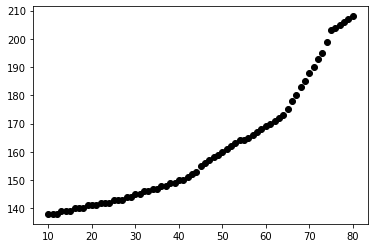

In [ ]:
plt.scatter(df['Age'].values, df['Height'].values, color='black')
plt.show()

In [ ]:
X=df.drop('Height', axis='columns').values

In [ ]:
Y=df['Height'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.15, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfModel=RandomForestRegressor()
rfModel.fit(X_train, Y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

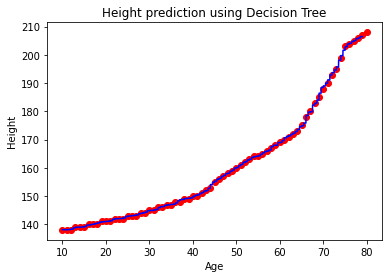

<Figure size 432x288 with 0 Axes>

In [ ]:
X_val=np.arange(X_train.min(), X_train.max(), 0.01)
X_val=X_val.reshape((len(X_val),1))
plt.scatter(X,Y, color='red')
plt.plot(X_val, rfModel.predict(X_val), color='blue')
plt.title('Height prediction using Decision Tree')
plt.xlabel('Age')
plt.ylabel('Height')
plt.figure()
plt.show()

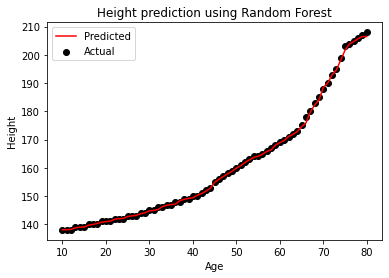

In [ ]:
plt.scatter(X,Y, color='#000000', label='Actual')
plt.plot(X, rfModel.predict(X), color='red', label='Predicted')
plt.title('Height prediction using Random Forest')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()
plt.show()

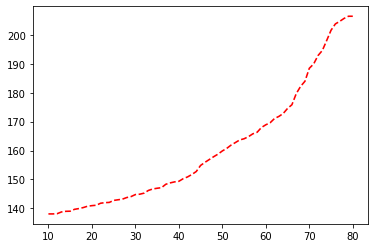

In [ ]:
plt.plot(X, rfModel.predict(X), color='red', linestyle='dashed', linewidth=1.6)

In [ ]:
Y_pred=rfModel.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print('Mean square error is {}'.format(mean_squared_error(Y_pred,Y_test)))
print('R2 score is {}'.format(r2_score(Y_pred,Y_test)))

Mean square error is 0.9490545454545486
R2 score is 0.9974833108450228
